In [61]:
!pip install pycountry

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 38.7 MB/s eta 0:00:00


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [91]:
df = pd.read_csv('data_date.csv')
df.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [92]:
df.isnull().any()

Date         False
Country      False
Status       False
AQI Value    False
dtype: bool

In [93]:
df['Date'] = pd.to_datetime(df['Date'])

In [101]:
le = LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['Status'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Unhealthy': 3, 'Unhealthy for Sensitive Groups': 4, 'Very Unhealthy': 5}


In [102]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

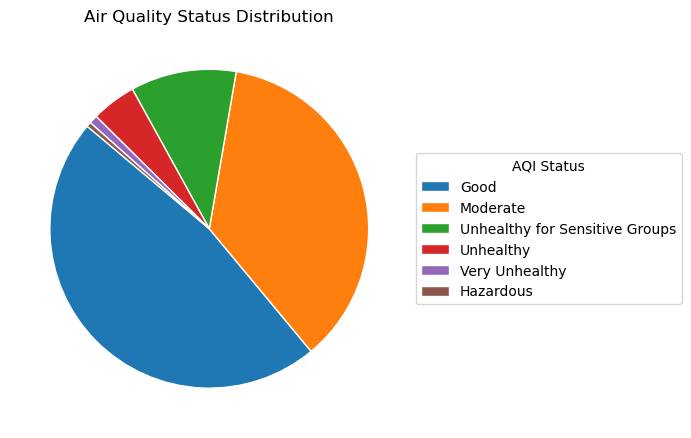

In [94]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(7, 7))

# Plot pie without percentages
df['Status'].value_counts().plot(
    kind='pie',
    labels=None,  # Removes labels on the pie
    startangle=140,
    title='Air Quality Status Distribution',
    wedgeprops={'edgecolor': 'white'},
    legend=False
)

# Add legend separately
plt.legend(
    labels=df['Status'].value_counts().index,
    title="AQI Status",
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# Remove y-label
plt.ylabel('')

plt.tight_layout()
plt.show()


C:\Users\sanja\AppData\Local\Temp\ipykernel_26484\3175150863.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




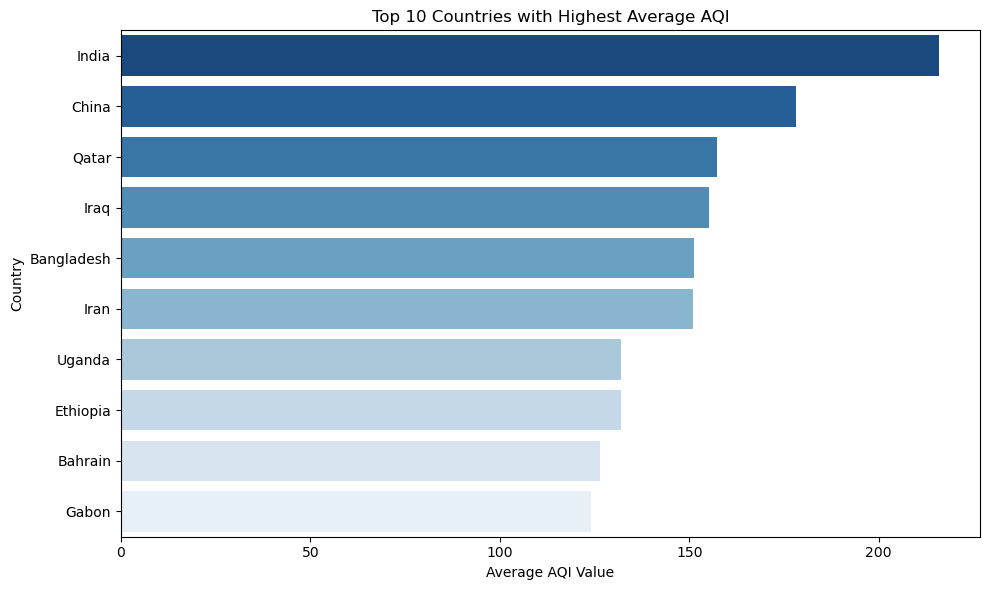

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and calculate the average AQI, then sort and take top 10
top10_avg_aqi = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top10_avg_aqi.values, y=top10_avg_aqi.index, palette='Blues_r')
plt.title('Top 10 Countries with Highest Average AQI')
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


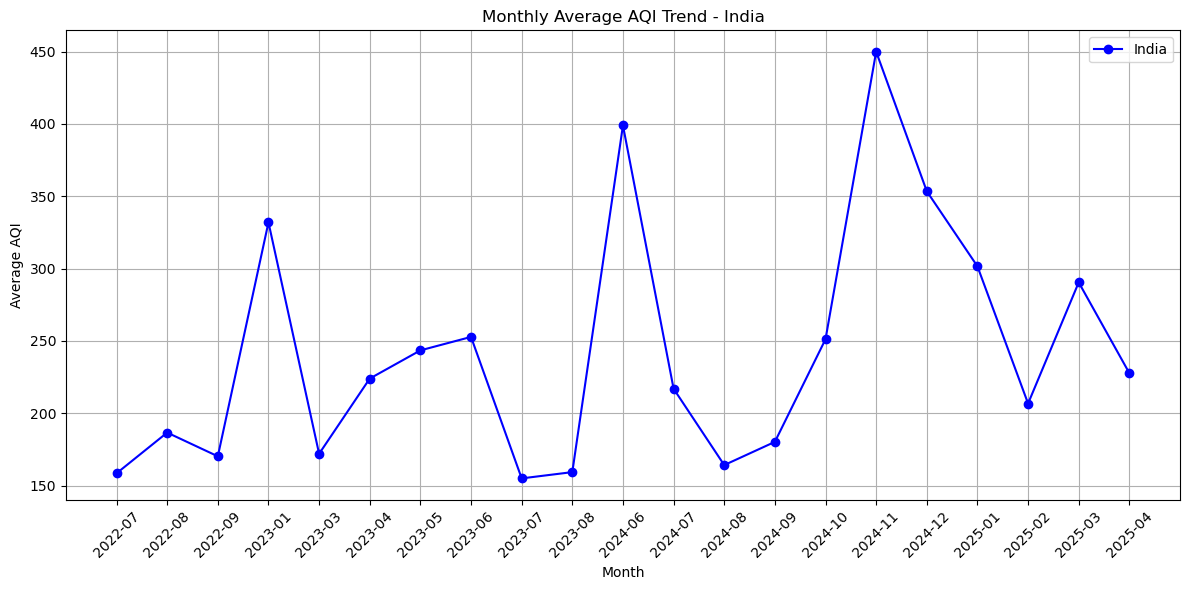

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert Date to datetime and extract Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')  # E.g., 2022-07

# Step 2: Filter data for India
india_df = df[df['Country'] == 'India']

# Step 3: Group by Month and calculate average AQI
india_monthly_avg = india_df.groupby('Month')['AQI Value'].mean().reset_index()

# Convert Month to string for plotting
india_monthly_avg['Month'] = india_monthly_avg['Month'].astype(str)

# Step 4: Plot
plt.figure(figsize=(12,6))
plt.plot(india_monthly_avg['Month'], india_monthly_avg['AQI Value'], marker='o', color='blue', label='India')

plt.title('Monthly Average AQI Trend - India')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

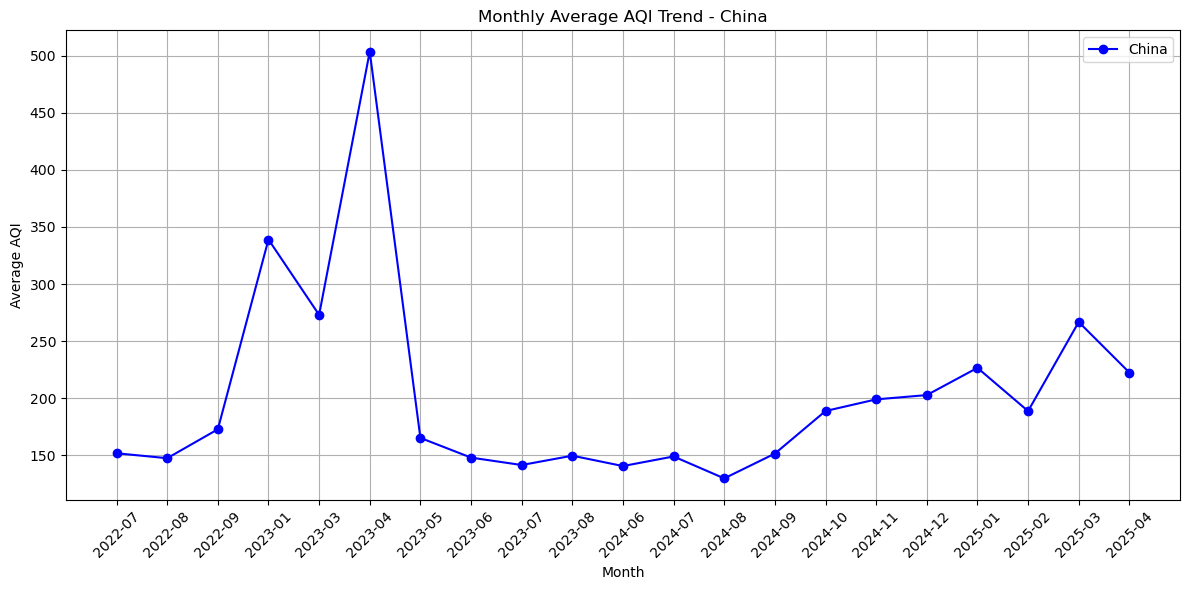

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert Date to datetime and extract Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')  # E.g., 2022-07

# Step 2: Filter data for India
india_df = df[df['Country'] == 'China']

# Step 3: Group by Month and calculate average AQI
india_monthly_avg = india_df.groupby('Month')['AQI Value'].mean().reset_index()

# Convert Month to string for plotting
india_monthly_avg['Month'] = india_monthly_avg['Month'].astype(str)

# Step 4: Plot
plt.figure(figsize=(12,6))
plt.plot(india_monthly_avg['Month'], india_monthly_avg['AQI Value'], marker='o', color='blue', label='China')

plt.title('Monthly Average AQI Trend - China')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

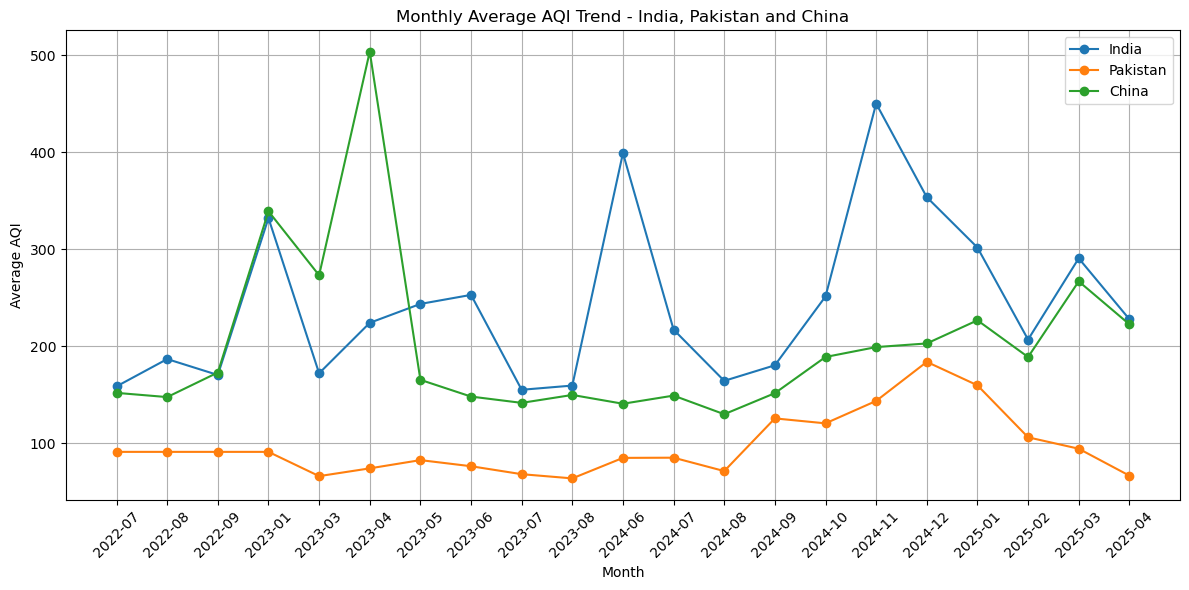

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert Date to datetime and extract Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')  # E.g., 2022-07

# Step 2: Filter data for Countries most affected by Winter Smog (India, Pakistan, China)
countries = ['India', 'Pakistan', 'China']
df_filtered = df[df['Country'].isin(countries)]

# Step 3: Group by Month and Country and calculate average AQI
monthly_avg = df_filtered.groupby(['Country', 'Month'])['AQI Value'].mean().reset_index()

# Convert Month to string for plotting
monthly_avg['Month'] = monthly_avg['Month'].astype(str)

# Step 4: Plot
plt.figure(figsize=(12,6))
for country in countries:
    country_data = monthly_avg[monthly_avg['Country'] == country]
    plt.plot(country_data['Month'], country_data['AQI Value'], marker='o', label=country)

plt.title('Monthly Average AQI Trend - India, Pakistan and China')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


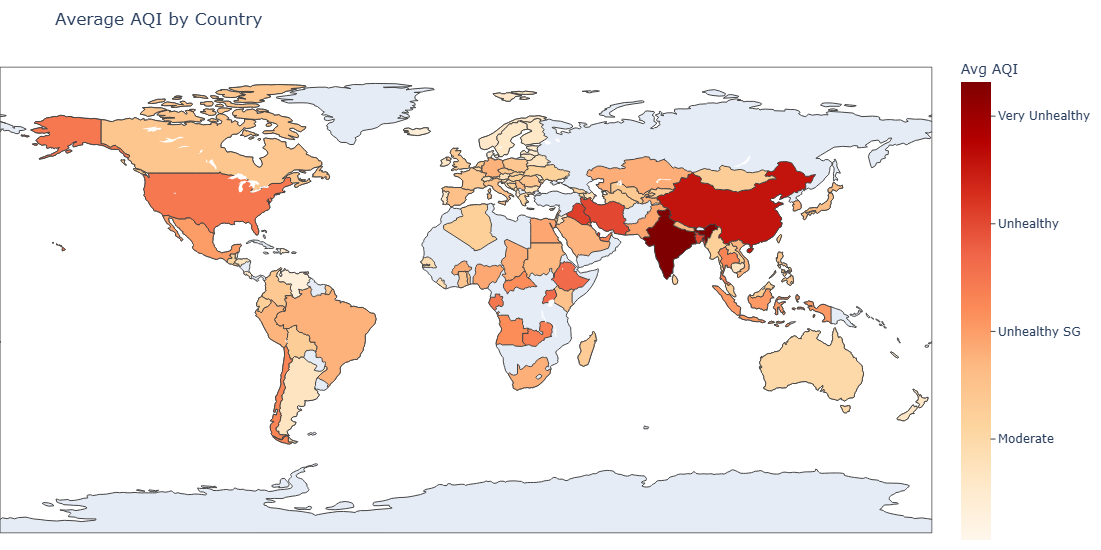

In [99]:
import pandas as pd
import plotly.express as px
import pycountry

# Helper function to convert country names to ISO alpha-3
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

# Calculate average AQI per country
country_avg_aqi = df.groupby('Country')['AQI Value'].mean().reset_index()
country_avg_aqi['ISO3'] = country_avg_aqi['Country'].apply(get_iso3)
country_avg_aqi = country_avg_aqi.dropna(subset=['ISO3'])

# Create choropleth map
fig = px.choropleth(
    country_avg_aqi,
    locations="ISO3",
    color="AQI Value",
    hover_name="Country",
    color_continuous_scale="OrRd",
    title="Average AQI by Country"
)

# Customize layout and colorbar (legend)
fig.update_layout(
    width=900,
    height=550,
    margin={"r":0, "t":50, "l":0, "b":0},
    coloraxis_colorbar=dict(
        title="Avg AQI",
        title_side="top",
        ticks="outside",
        tickvals=[0, 50, 100, 150, 200, 300],
        ticktext=["Good", "Moderate", "Unhealthy SG", "Unhealthy", "Very Unhealthy", "Hazardous"]
    )
)

fig.show()

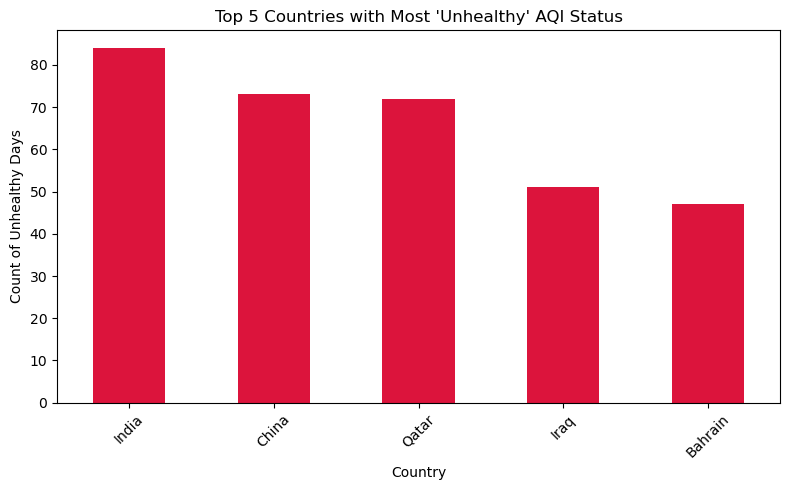

In [100]:
import matplotlib.pyplot as plt

# Filter for 'Unhealthy' status and count occurrences
unhealthy_counts = df[df['Status'] == 'Unhealthy']['Country'].value_counts().head(5)

# Plot
unhealthy_counts.plot(kind='bar', color='crimson', figsize=(8,5))
plt.title("Top 5 Countries with Most 'Unhealthy' AQI Status")
plt.ylabel("Count of Unhealthy Days")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [104]:
features = df[['AQI Value', 'Day', 'Month', 'Year']]
labels = df['Status_encoded']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [153]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [154]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9994700582935877


In [155]:
y_test_bin = (y_test == 0).astype(int)
y_scores = model.predict_proba(X_test)[:, 0]
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)

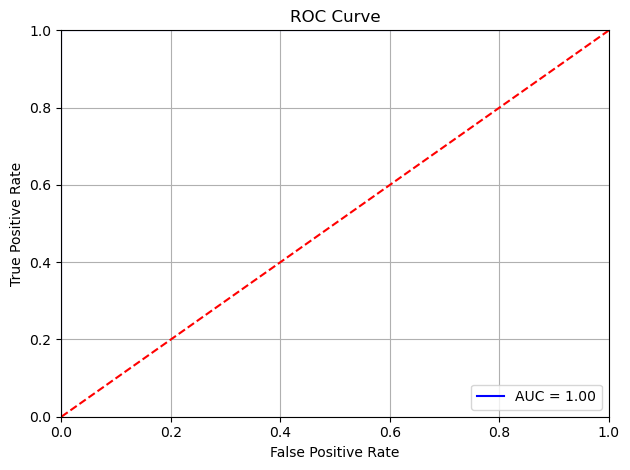

In [156]:
plt.title("ROC Curve")
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [157]:
sample_input = pd.DataFrame([{
    'AQI Value': 65,
    'Day': 21,
    'Month': 7,
    'Year': 2022
}])

# Prediction
sample_prediction_encoded = model.predict(sample_input)[0]

# Decoding
sample_prediction_label = le.inverse_transform([sample_prediction_encoded])[0]

print("Predicted (Encoded):", sample_prediction_encoded)
print("Predicted (Label):", sample_prediction_label)

Predicted (Encoded): 2
Predicted (Label): Moderate
